# DataSet

In [308]:
import pandas as pd

In [309]:
# Import data
df = pd.read_csv('train.csv', index_col='Id')
df.head(2)

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
Id,,,,,,,,,,,,,,,,,,,,,
242642,2881,130,22,210,54,1020,250,221,88,342,...,0,0,0,0,0,0,0,0,0,1
309891,3005,351,14,242,-16,1371,194,215,159,842,...,0,0,0,0,0,0,0,0,0,1


In [32]:
print('\nObservations: {} Features: {}'.format(df.shape[0], df.shape[1]))


Observations: 15120 Features: 55


## Data analysis

In [310]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [34]:
# Occurance per cover type
df.groupby('Cover_Type').size()

Cover_Type
1    2160
2    2160
3    2160
4    2160
5    2160
6    2160
7    2160
dtype: int64

In [35]:
# Check for duplicates

df.drop_duplicates(keep='first')
df.shape

(15120, 55)

There are no duplicates

In [36]:
# Check if any column is null

df.isnull().values.any()

False

We don't have any null column

In [37]:
# Divide features between numerical and categorical
num_df = df.loc[:,'Elevation':'Horizontal_Distance_To_Fire_Points']
cat_df  = df.loc[:,'Wilderness_Area1':'Soil_Type40']
target  = df['Cover_Type']

### Numerical Data

#### Basic Information

In [38]:
num_df.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points
count,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000
mean,2748.649934,155.834524,16.556746,228.376521,51.311706,1717.977712,213.028836,218.865741,134.477116,1527.357804
std,419.009589,109.745372,8.534602,209.196381,61.520488,1330.263450,30.638406,22.797288,46.070054,1116.636997
min,1877.000000,0.000000,0.000000,0.000000,-135.000000,0.000000,52.000000,99.000000,0.000000,0.000000
25%,2373.000000,65.000000,10.000000,67.000000,5.000000,760.000000,197.000000,207.000000,106.000000,750.000000
50%,2754.000000,125.000000,15.000000,180.000000,32.000000,1315.000000,220.000000,223.000000,138.000000,1266.000000
75%,3109.000000,257.000000,22.000000,330.000000,80.000000,2292.000000,236.000000,235.000000,166.000000,2002.000000
max,3850.000000,360.000000,50.000000,1376.000000,570.000000,6803.000000,254.000000,254.000000,251.000000,7095.000000


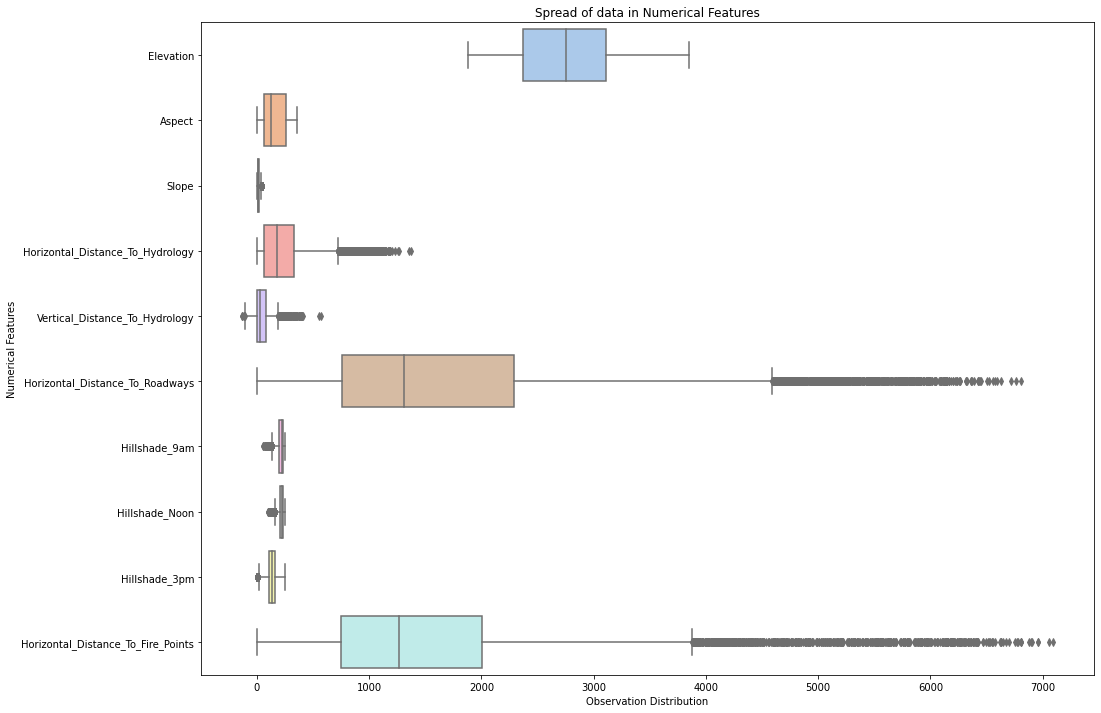

In [39]:
# study the Spread of numerical features

plt.subplots(figsize=(16, 12))
sns.boxplot(data=num_df, orient='h', palette='pastel')

plt.title('Spread of data in Numerical Features')
plt.ylabel('Numerical Features')
plt.xlabel('Observation Distribution')
plt.show()

#### Correlation

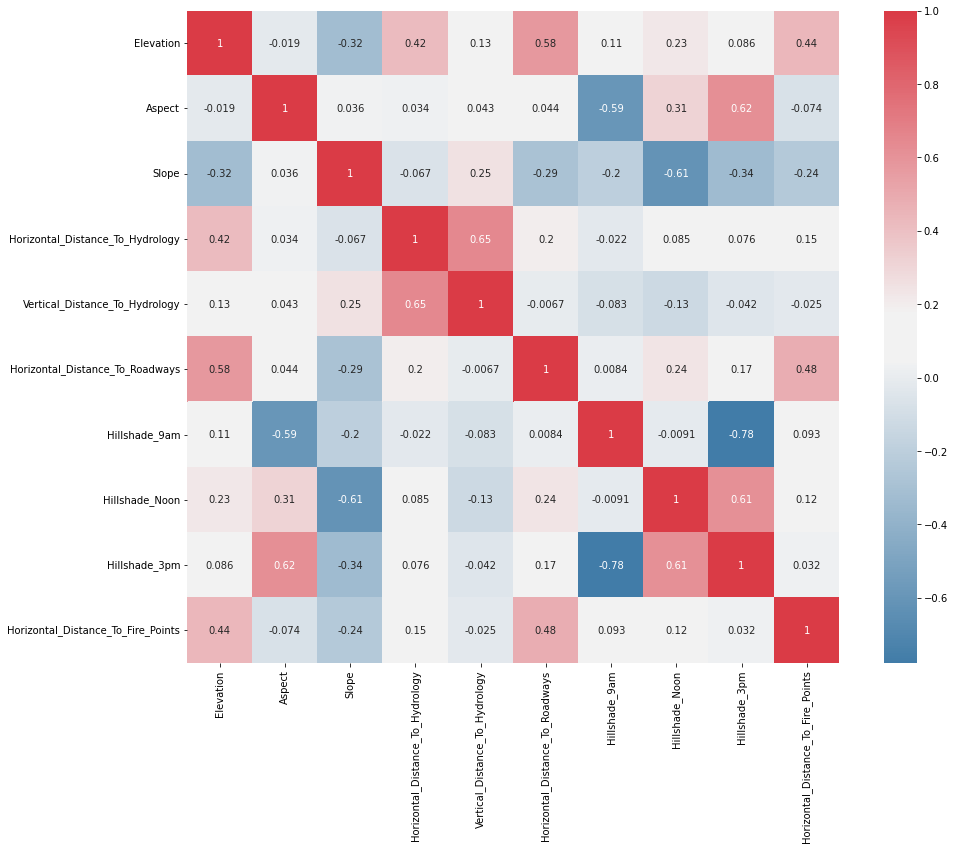

In [40]:
# Correlation for numerical features

# Create a convariance matrix
corr = num_df.corr()

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(16, 12))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(240, 10, sep=20, n=9, as_cmap=True)

# Draw the heatmap
sns.heatmap(corr, cmap=cmap, square=True, annot=True)

plt.show()

We have the same number of samples per cover type

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f88a7bd5f40>,
      dtype=object)

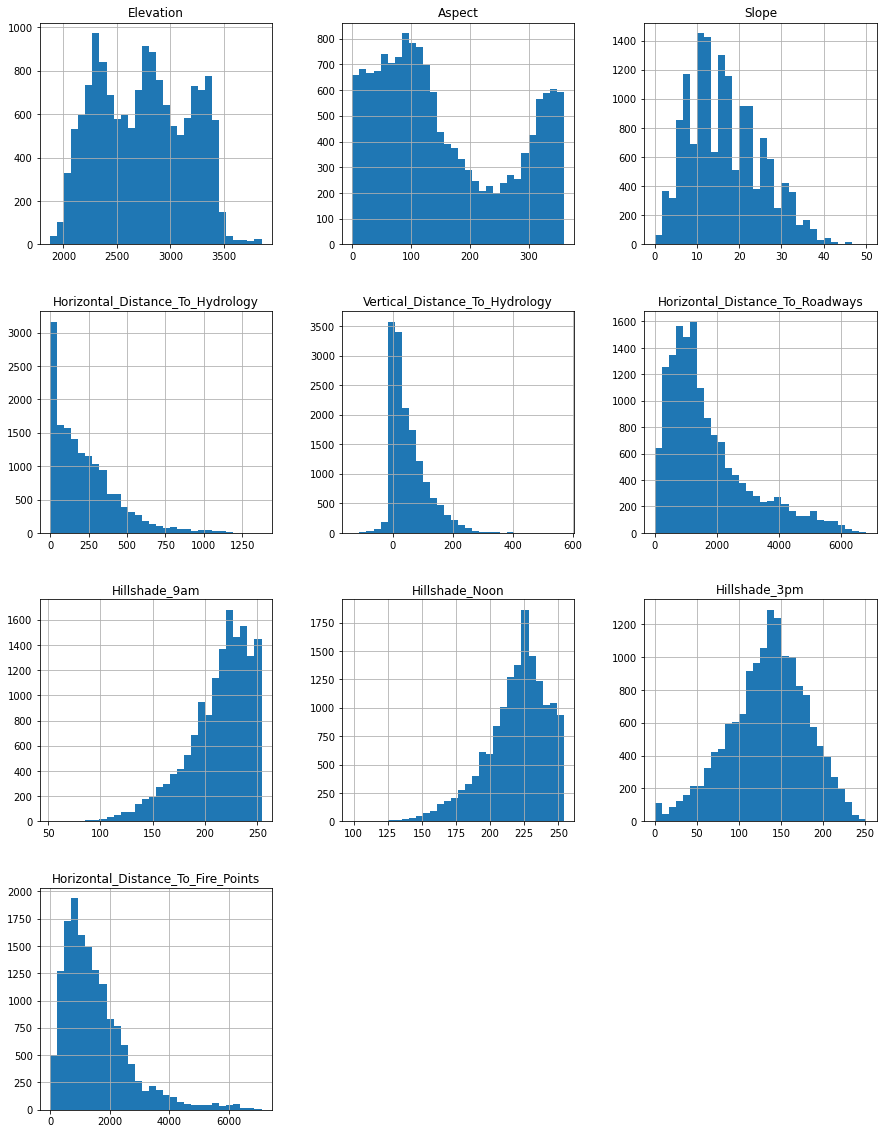

In [41]:
num_df.hist(bins=30, figsize=(15, 20))

#### Correlation with Cover Type

In [44]:
num_df_cover = num_df.join(pd.get_dummies(df['Cover_Type']))

In [45]:
(num_df_cover.corr()[1]).sort_values()

4                                    -0.166667
5                                    -0.166667
6                                    -0.166667
3                                    -0.166667
7                                    -0.166667
2                                    -0.166667
Slope                                -0.160684
Vertical_Distance_To_Hydrology       -0.050144
Hillshade_9am                        -0.008089
Aspect                                0.000194
Hillshade_3pm                         0.076385
Hillshade_Noon                        0.077760
Horizontal_Distance_To_Hydrology      0.098244
Horizontal_Distance_To_Fire_Points    0.182391
Horizontal_Distance_To_Roadways       0.278615
Elevation                             0.371528
1                                     1.000000
Name: 1, dtype: float64

Aspect, and Hillshade 9 am has almost zero correlation, so we remove them

### Categorical Data

In [57]:
def combine_one_hot(one_hot_columns, text):
  new_df=((one_hot_columns==1).idxmax(1)).apply(lambda x : x.replace(text,"")).astype('int64')
  return(new_df)

In [58]:
wilderness_df = df.loc[:,'Wilderness_Area1': 'Wilderness_Area4']

for c, e in enumerate(wilderness_df.columns):
    print( 'Wilderness', c+1, wilderness_df[e].value_counts()[1])

Wilderness 1 3568
Wilderness 2 569
Wilderness 3 6302
Wilderness 4 4681


In [59]:
df['Wilderness_Types'] = combine_one_hot(wilderness_df, "Wilderness_Area")

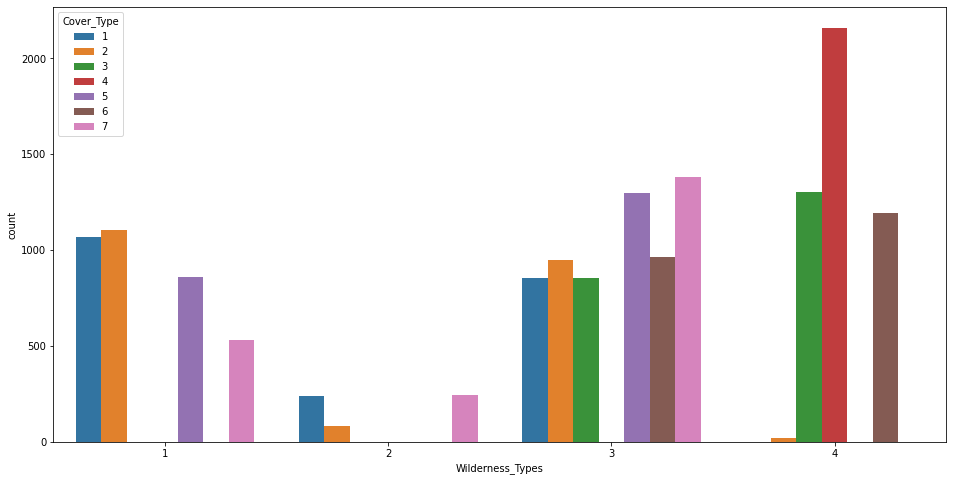

In [60]:
plt.figure(figsize=(16, 8))
sns.countplot(data=df, x='Wilderness_Types', hue='Cover_Type')

# Drop added feature
df.drop(['Wilderness_Types'], axis=1, inplace=True)
plt.show();

In [62]:
soil_df = df.loc[:,'Soil_Type1':'Soil_Type40']

for c, e in enumerate(soil_df.columns):
    print( 'Soil', c+1, sum(soil_df[e].to_list()))

Soil 1 339
Soil 2 627
Soil 3 1006
Soil 4 839
Soil 5 181
Soil 6 679
Soil 7 1
Soil 8 2
Soil 9 4
Soil 10 2096
Soil 11 376
Soil 12 260
Soil 13 513
Soil 14 173
Soil 15 0
Soil 16 106
Soil 17 640
Soil 18 44
Soil 19 53
Soil 20 132
Soil 21 10
Soil 22 332
Soil 23 742
Soil 24 265
Soil 25 6
Soil 26 48
Soil 27 8
Soil 28 7
Soil 29 1308
Soil 30 736
Soil 31 304
Soil 32 663
Soil 33 619
Soil 34 18
Soil 35 103
Soil 36 14
Soil 37 32
Soil 38 744
Soil 39 634
Soil 40 456


In [63]:
df['Soil_Type'] = combine_one_hot(soil_df, "Soil_Type")

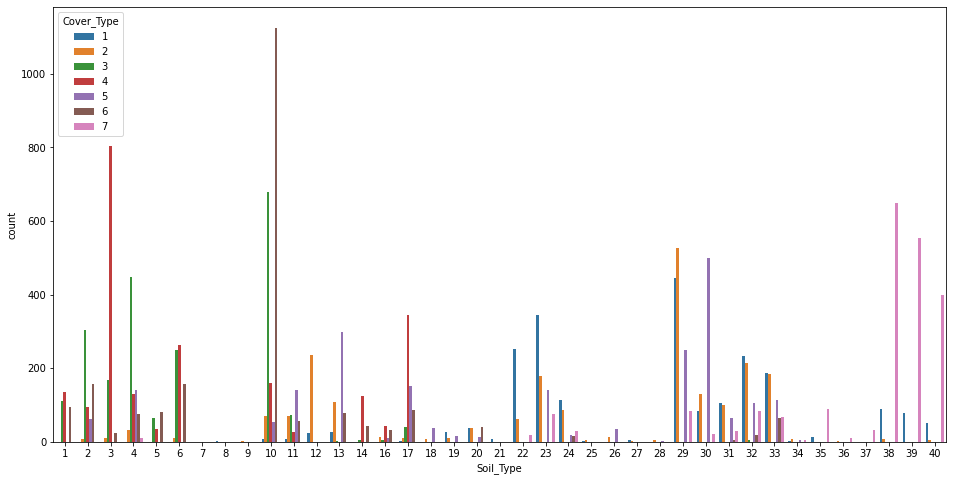

In [65]:
plt.figure(figsize=(16, 8))
sns.countplot(data=df, x='Soil_Type', hue='Cover_Type')

# Drop added feature
df.drop(['Soil_Type'], axis=1, inplace=True)
plt.show();

## Data Preprocessing

In [311]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelBinarizer
from sklearn.decomposition import PCA

### Feature engineering and selection

In [312]:
y = df['Cover_Type'].values.flatten()
X = df.drop('Cover_Type', axis=1)

In [313]:
# one_hot_encode y
def one_hot_encode(y):
  lb = LabelBinarizer()
  lb.fit([1, 2, 3, 4, 5, 6, 7])
  return lb.transform(y)

# Reverse of one_hot_encode
def combine_one_hot(one_hot_columns):
  new_df=((one_hot_columns==1).idxmax(1)).apply(lambda x : x.replace("Soil_Type","")).astype('int64')
  return(new_df)

In [314]:
# Combine the soil type into one column instead of 40

def combine_soil(X):
    soil_df = X.loc[:,'Soil_Type1':'Soil_Type40']
    X = X.drop(soil_df.columns, axis=1)
    X['Soil_Type'] = combine_one_hot(soil_df)
    return X

In [315]:
# Very basic linear combination

def lin_feature_engineering(X):

  X["sum_Hydrology_Firepoints"]=X['Horizontal_Distance_To_Hydrology'] + X['Horizontal_Distance_To_Fire_Points']   
  X["diff_Hydrology_Firepoints"]=np.abs(X['Horizontal_Distance_To_Hydrology'] - X['Horizontal_Distance_To_Fire_Points'] )  

  X["sum_Hydrology_Roadways"]=X['Horizontal_Distance_To_Hydrology'] + X['Horizontal_Distance_To_Roadways']
  X["diff_Hydrology_Roadways"]=np.abs(X['Horizontal_Distance_To_Hydrology'] - X['Horizontal_Distance_To_Roadways'] )   

  X["sum_Firepoints_Roadways"]=X['Horizontal_Distance_To_Fire_Points'] +  X['Horizontal_Distance_To_Roadways']
  X["diff_Firepoints_Roadways"]=np.abs(X['Horizontal_Distance_To_Fire_Points'] - X['Horizontal_Distance_To_Roadways'])   

  X["sum_Horizontal_Hydrology_elevation "]=X['Horizontal_Distance_To_Hydrology'] +  X['Elevation']
  X["diff_Horizontal_Hydrology_elevation "]=np.abs(X['Horizontal_Distance_To_Hydrology'] -  X['Elevation'])

  X["sum_vertical_Hydrology_elevation "]=X['Vertical_Distance_To_Hydrology'] +  X['Elevation']
  X["diff_Vertical_Hydrology_elevation "]=np.abs(X['Vertical_Distance_To_Hydrology'] -  X['Elevation'])

  return X

In [316]:
# Based on the skewness study we either apply log or square to some of our numerical data

def non_lin_feature_engineering(X):
  X["distance_to_hydrology"]=(X["Vertical_Distance_To_Hydrology"]**2+X["Horizontal_Distance_To_Hydrology"]**2)**0.5
  X["log_distance_to_hydrology"]=np.log(X["distance_to_hydrology"]+1)
  X["log_Horizontal_Distance_To_Fire_Points"]=np.log(X["Horizontal_Distance_To_Fire_Points"]+1)
  X["log_Horizontal_Distance_To_Roadways"]=np.log(X["Horizontal_Distance_To_Roadways"]+1)
  X["log_Horizontal_Distance_To_Hydrology"]=np.log(X["Horizontal_Distance_To_Hydrology"]+1)
  X["sqr_Hillshade_3pm"]=X["Hillshade_3pm"]**2
  X["sqr_Hillshade_Noon"]=X["Hillshade_Noon"]**2
  return X

In [317]:
def preprocess(X, comb_soil=True, scale=False, dim_red=False):

  if comb_soil:
      X = combine_soil(X)

  # Drop Hillshade_9am and Aspect
  X = X.drop(["Hillshade_9am", "Aspect"], axis=1)

  # Create new_features based on linear combinations from our existing features 
  X = lin_feature_engineering(X)

  # Create new_features based on none-linear combinations from our existing features using the skewness
  X = non_lin_feature_engineering(X)

  # Reduce the dimension using PCA
  if dim_red:
    pca = PCA(n_components=20)
    X = pca.fit_transform(X)

  return X

In [318]:
final_df = preprocess(X).join(pd.get_dummies(df['Cover_Type']))

In [319]:
(final_df.corr()[1]).sort_values()

Wilderness_Area4                         -0.273378
4                                        -0.166667
5                                        -0.166667
6                                        -0.166667
3                                        -0.166667
7                                        -0.166667
2                                        -0.166667
Slope                                    -0.160684
Vertical_Distance_To_Hydrology           -0.050144
Wilderness_Area3                         -0.017360
sqr_Hillshade_3pm                         0.053584
sqr_Hillshade_Noon                        0.073735
Hillshade_3pm                             0.076385
Hillshade_Noon                            0.077760
distance_to_hydrology                     0.089622
log_distance_to_hydrology                 0.092262
log_Horizontal_Distance_To_Hydrology      0.097283
Horizontal_Distance_To_Hydrology          0.098244
Wilderness_Area2                          0.154649
diff_Hydrology_Firepoints      

Among all those features we chose those who have the highest correlation with the cover type

In [320]:
chosen_features=["sum_Hydrology_Roadways", "diff_Hydrology_Roadways", 
                 "sum_Firepoints_Roadways","diff_Firepoints_Roadways",
                 "sum_Hydrology_Firepoints", "diff_Hydrology_Firepoints",
                 "sum_Horizontal_Hydrology_elevation ", "diff_Horizontal_Hydrology_elevation ",
                 "sum_vertical_Hydrology_elevation ","diff_Vertical_Hydrology_elevation ", 
                 "Elevation","Slope","Horizontal_Distance_To_Fire_Points", "Horizontal_Distance_To_Roadways","Horizontal_Distance_To_Hydrology","Hillshade_Noon", "Hillshade_3pm",
                 "log_distance_to_hydrology",
                 "Wilderness_Area1","Wilderness_Area2","Wilderness_Area3","Wilderness_Area4","Soil_Type"
                 ]

In [321]:
chosen_features_1=["sum_Hydrology_Roadways", "diff_Hydrology_Roadways", 
                 "sum_Firepoints_Roadways","diff_Firepoints_Roadways",
                 "sum_Hydrology_Firepoints", "diff_Hydrology_Firepoints",
                 "sum_Horizontal_Hydrology_elevation ", "diff_Horizontal_Hydrology_elevation ",
                 "sum_vertical_Hydrology_elevation ","diff_Vertical_Hydrology_elevation ", 
                 "Elevation","Slope","Horizontal_Distance_To_Fire_Points", "Horizontal_Distance_To_Roadways","Horizontal_Distance_To_Hydrology","Hillshade_Noon", "Hillshade_3pm",
                 "log_distance_to_hydrology",
                 "Wilderness_Area1","Wilderness_Area2","Wilderness_Area3","Wilderness_Area4",'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
       'Soil_Type39', 'Soil_Type40']

### Final preprocess

In [322]:
def preprocess(X, comb_soil=True, scale=False, dim_red=False, chosen_features=chosen_features):

  if comb_soil:
      X = combine_soil(X)

  # Drop Hillshade_9am and Aspect
  X = X.drop(["Hillshade_9am", "Aspect"], axis=1)

  # Create new_features based on linear combinations from our existing features 
  X = lin_feature_engineering(X)

  # Create new_features based on none-linear combinations from our existing features using the skewness
  X = non_lin_feature_engineering(X)

  X = X[chosen_features]

  # Reduce the dimension using PCA
  if dim_red:
    pca = PCA(n_components=20)
    X = pca.fit_transform(X)

  return X

In [323]:
# Scale numerical features

def scale(X, ref):
  cat_X_train = ref.iloc[:, -44:]
  num_X_train = ref.drop(cat_X_train.columns, axis=1)
  scaler = StandardScaler()
  scaler.fit(num_X_train)

  cat_X = X.iloc[:, -44:]
  num_X = X.drop(cat_X.columns.to_list(), axis=1)
  num_X = scaler.transform(num_X.values)
  return np.concatenate((num_X, cat_X.values),axis=1)

# Models

In [333]:
result = pd.DataFrame({'Metric': ['Accuracy', 'Precision', 'Recall', 'F1']})

## *Extra Tree Classifier*

In [324]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix

In [325]:
y = df['Cover_Type'].values.flatten()
X = df.drop('Cover_Type', axis=1)

In [326]:
# Cross_validation
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [327]:
X_train = preprocess(X_train, comb_soil=True, scale=False, dim_red=False, chosen_features=chosen_features)
X_test = preprocess(X_test, comb_soil=True, scale=False, dim_red=False, chosen_features=chosen_features)

In [328]:
etc_model = ExtraTreesClassifier(criterion='gini',max_depth=None,n_estimators=1500,min_samples_split=2,min_samples_leaf=1)
etc_model.fit(X_train, y_train)

ExtraTreesClassifier(n_estimators=1500)

In [130]:
accuracy_score(etc_model.predict(X_test), y_test)

0.8992063492063492

In [332]:
y_pred = etc_model.predict(X_test)

# Compute accuracy
accuracy = accuracy_score(y_pred, y_test)

# Compute the precision, recall, and F1 score
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='macro')

# Create a data frame with the results
results = pd.DataFrame({'Metric': ['Accuracy', 'Precision', 'Recall', 'F1'],
                        'ETC': [accuracy, precision, recall, f1]})

results

,Metric,ETC
0,Accuracy,0.901058
1,Precision,0.897769
2,Recall,0.898928
3,F1,0.897787


In [334]:
result = result.join(results['ETC'])

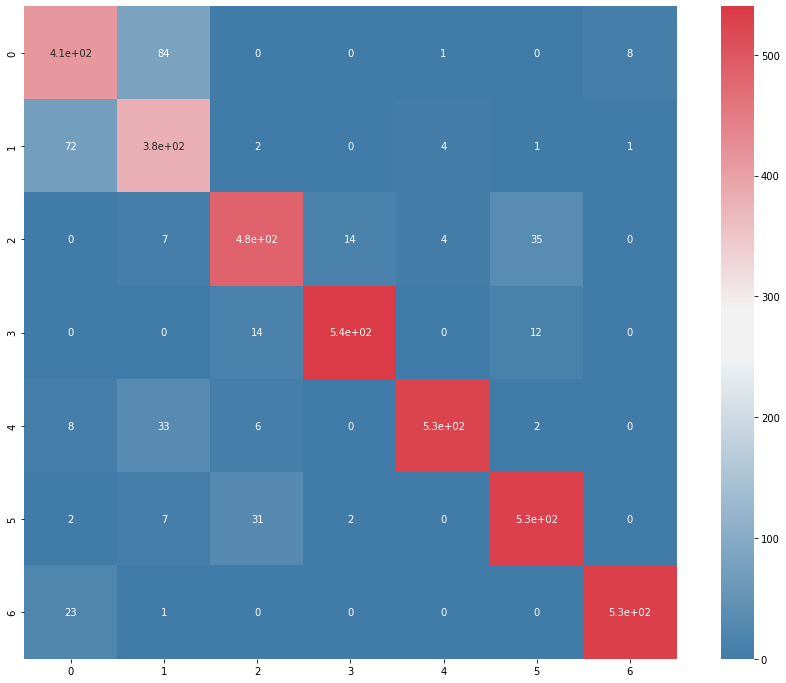

In [337]:
# Confusion Matrix of ETC

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(16, 12))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(240, 10, sep=20, n=9, as_cmap=True)

# Draw the heatmap
sns.heatmap(confusion_matrix(y_pred, y_test), cmap=cmap, square=True, annot=True)

plt.show()

The highest confusion is between cover type 1 and 2

In [131]:
# Test
test_data = pd.read_csv("test-full.csv", index_col='Id')
X_submit = preprocess(test_data, comb_soil=True, scale=False, dim_red=False, chosen_features=chosen_features)
y_pred = etc_model.predict(X_submit)

In [134]:
submission_df=pd.DataFrame(y_pred,columns=['Cover_Type'])
submission_df.index += 1
submission_df.index.names = ['Id']
submission_df.to_csv('submission.csv', header=True)

It gave 0.815 on Kaggle

## Random Forest

In [338]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [339]:
y = df['Cover_Type'].values.flatten()
X = df.drop('Cover_Type', axis=1)

In [340]:
# Cross_validation
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [341]:
X_train = preprocess(X_train, comb_soil=True, scale=False, dim_red=False, chosen_features=chosen_features)
X_test = preprocess(X_test, comb_soil=True, scale=False, dim_red=False, chosen_features=chosen_features)

In [342]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [343]:
# cross_validation accuracy

accuracy_score(rf_model.predict(X_test), y_test)

0.8867724867724868

In [349]:
y_pred = rf_model.predict(X_test)

# Compute accuracy
accuracy = accuracy_score(y_pred, y_test)

# Compute the precision, recall, and F1 score
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='macro')

# Create a data frame with the results
results = pd.DataFrame({'Metric': ['Accuracy', 'Precision', 'Recall', 'F1'],
                        'RF': [accuracy, precision, recall, f1]})

results

,Metric,RF
0,Accuracy,0.886772
1,Precision,0.883330
2,Recall,0.884673
3,F1,0.883099


In [350]:
result = result.join(results['RF'])

In [ ]:
# Test
test_data = pd.read_csv("test-full.csv", index_col='Id')
X_submit = preprocess(test_data, comb_soil=True, scale=False, dim_red=False, chosen_features=chosen_features)
y_pred = rf_model.predict(X_submit)

In [ ]:
submission_df=pd.DataFrame(y_pred,columns=['Cover_Type'])
submission_df.index += 1
submission_df.index.names = ['Id']
submission_df.to_csv('submission.csv', header=True)

This model gave a 0.7944 on Kaggle

## XGBoost

In [352]:
from xgboost import XGBClassifier

In [353]:
y = df['Cover_Type'].values.flatten()
X = df.drop('Cover_Type', axis=1)

In [354]:
# Cross_validation
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [355]:
X_train = preprocess(X_train, comb_soil=True, scale=False, dim_red=False, chosen_features=chosen_features)
X_test = preprocess(X_test, comb_soil=True, scale=False, dim_red=False, chosen_features=chosen_features)

In [356]:
XGB = XGBClassifier()

In [357]:
XGB.fit(X_train, y_train)

XGBClassifier(objective='multi:softprob')

In [358]:
y_pred = XGB.predict(X_test)

# Compute accuracy
accuracy = accuracy_score(y_pred, y_test)

# Compute the precision, recall, and F1 score
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='macro')

# Create a data frame with the results
results = pd.DataFrame({'Metric': ['Accuracy', 'Precision', 'Recall', 'F1'],
                        'XGB': [accuracy, precision, recall, f1]})

results

,Metric,XGB
0,Accuracy,0.783598
1,Precision,0.779551
2,Recall,0.781224
3,F1,0.776395


In [359]:
result = result.join(results['XGB'])

In [156]:
# cross_validation accuracy

accuracy_score(XGB.predict(X_test), y_test)

0.7835978835978836

In [ ]:
# Test
test_data = pd.read_csv("test-full.csv", index_col='Id')
X_submit = preprocess(test_data, comb_soil=True, scale=False, dim_red=False, chosen_features=chosen_features)
y_pred = etc_model.predict(X_submit)

In [ ]:
submission_df=pd.DataFrame(y_pred,columns=['Cover_Type'])
submission_df.index += 1
submission_df.index.names = ['Id']
submission_df.to_csv('submission.csv', header=True)

It gave a score of 0.75 on Kaggle

## SVM

In [360]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [361]:
y = df['Cover_Type'].values.flatten()
X = df.drop('Cover_Type', axis=1)

In [362]:
# Cross_validation
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [363]:
X_train = preprocess(X_train, comb_soil=False, scale=False, dim_red=False, chosen_features=chosen_features_1)
X_test = preprocess(X_test, comb_soil=False, scale=False, dim_red=False, chosen_features=chosen_features_1)

In [364]:
ref = X_train.copy()

In [365]:
X_test = scale(X_test, ref)
X_train = scale(X_train, ref)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [366]:
# Build the model
svm_model = SVC(kernel='rbf', C=1.0, random_state=42)

# Train the model on the training set
svm_model.fit(X_train, y_train)

SVC(random_state=42)

In [257]:
accuracy_score(svm_model.predict(X_test), y_test)

0.8042328042328042

In [367]:
y_pred = svm_model.predict(X_test)

# Compute accuracy
accuracy = accuracy_score(y_pred, y_test)

# Compute the precision, recall, and F1 score
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='macro')

# Create a data frame with the results
results = pd.DataFrame({'Metric': ['Accuracy', 'Precision', 'Recall', 'F1'],
                        'SVM': [accuracy, precision, recall, f1]})

results

,Metric,SVM
0,Accuracy,0.804233
1,Precision,0.800973
2,Recall,0.802109
3,F1,0.800253


In [368]:
result = result.join(results['SVM'])

In [273]:
# Test
test_data = pd.read_csv("test-full.csv", index_col='Id')
X_submit = preprocess(test_data, comb_soil=False, scale=False, dim_red=False, chosen_features=chosen_features_1)
X_test = scale(X_submit, ref)
y_pred = svm_model.predict(X_submit)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


In [ ]:
submission_df=pd.DataFrame(y_pred,columns=['Cover_Type'])
submission_df.index += 1
submission_df.index.names = ['Id']
submission_df.to_csv('submission.csv', header=True)

It gave 0.72 on Kaggle

## Logistic regression

In [370]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [371]:
y = df['Cover_Type'].values.flatten()
X = df.drop('Cover_Type', axis=1)

In [372]:
# Cross_validation
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [373]:
X_train = preprocess(X_train, comb_soil=False, scale=False, dim_red=False, chosen_features=chosen_features_1)
X_test = preprocess(X_test, comb_soil=False, scale=False, dim_red=False, chosen_features=chosen_features_1)

In [374]:
ref = X_train.copy()

In [375]:
X_test = scale(X_test, ref)
X_train = scale(X_train, ref)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [376]:
log_model = LogisticRegression(random_state = 42)
log_model.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [281]:
accuracy_score(log_model.predict(X_test), y_test)

0.7166666666666667

In [377]:
y_pred = log_model.predict(X_test)

# Compute accuracy
accuracy = accuracy_score(y_pred, y_test)

# Compute the precision, recall, and F1 score
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='macro')

# Create a data frame with the results
results = pd.DataFrame({'Metric': ['Accuracy', 'Precision', 'Recall', 'F1'],
                        'Log': [accuracy, precision, recall, f1]})

results

,Metric,Log
0,Accuracy,0.716667
1,Precision,0.712485
2,Recall,0.714586
3,F1,0.712545


In [378]:
result = result.join(results['Log'])

In [ ]:
# Test
test_data = pd.read_csv("test-full.csv", index_col='Id')
X_submit = preprocess(test_data, comb_soil=False, scale=False, dim_red=False, chosen_features=chosen_features_1)
X_submit = scale(X_submit, ref)
y_pred = log_model.predict(X_submit)

In [ ]:
submission_df=pd.DataFrame(y_pred,columns=['Cover_Type'])
submission_df.index += 1
submission_df.index.names = ['Id']
submission_df.to_csv('submission.csv', header=True)

0.64 on Kaggle

## KNN

In [379]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [416]:
y = df['Cover_Type'].values.flatten()
X = df.drop('Cover_Type', axis=1)

In [417]:
# Cross_validation
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [382]:
X_train = preprocess(X_train, comb_soil=False, scale=False, dim_red=False, chosen_features=chosen_features_1)
X_test = preprocess(X_test, comb_soil=False, scale=False, dim_red=False, chosen_features=chosen_features_1)

In [383]:
ref = X_train.copy()

In [384]:
X_test = scale(X_test, ref)
X_train = scale(X_train, ref)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [385]:
knn_model = KNeighborsClassifier(weights='distance', n_jobs=-1)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_jobs=-1, weights='distance')

In [289]:
accuracy_score(knn_model.predict(X_test), y_test)

0.8465608465608465

In [386]:
y_pred = knn_model.predict(X_test)

# Compute accuracy
accuracy = accuracy_score(y_pred, y_test)

# Compute the precision, recall, and F1 score
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='macro')

# Create a data frame with the results
results = pd.DataFrame({'Metric': ['Accuracy', 'Precision', 'Recall', 'F1'],
                        'KNN': [accuracy, precision, recall, f1]})

results

,Metric,KNN
0,Accuracy,0.846561
1,Precision,0.842851
2,Recall,0.843766
3,F1,0.841256


In [387]:
result = result.join(results['KNN'])

In [ ]:
# Test
test_data = pd.read_csv("test-full.csv", index_col='Id')
X_submit = preprocess(test_data, comb_soil=False, scale=False, dim_red=False, chosen_features=chosen_features_1)
X_submit = scale(X_submit, ref)
y_pred = knn_model.predict(X_submit)

In [ ]:
submission_df=pd.DataFrame(y_pred,columns=['Cover_Type'])
submission_df.index += 1
submission_df.index.names = ['Id']
submission_df.to_csv('submission.csv', header=True)

0.67 on Kaggle

## Two layer Neural Network

In [388]:
import torch
import torch.nn as nn
import torch.optim as optim

In [389]:
y = df['Cover_Type'].values.flatten()
X = df.drop('Cover_Type', axis=1)

In [390]:
# Cross_validation
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [391]:
X_train = preprocess(X_train, comb_soil=False, scale=False, dim_red=False, chosen_features=chosen_features_1)
X_test = preprocess(X_test, comb_soil=False, scale=False, dim_red=False, chosen_features=chosen_features_1)

In [392]:
ref = X_train.copy()

In [393]:
X_test = scale(X_test, ref)
X_train = scale(X_train, ref)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [394]:
y_train = one_hot_encode(y_train)
y_test = one_hot_encode(y_test)

In [395]:
# First, we define the model architecture.
# In this example, we will use a simple feedforward network with 3 hidden layers.
class Net(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, num_classes):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.fc3 = nn.Linear(hidden_size2, num_classes)
        self.relu = nn.ReLU()
        self.softmax = nn.Softmax(dim=1)
        
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        # x = self.relu(x)
        # x = self.fc4(x)
        return self.softmax(x)

In [396]:
input_size = 62 # The number of predictor variables.
hidden_size1 = 100
hidden_size2 = 10
# hidden_size3 = 20
num_classes = 7  # The number of forest cover types.

In [397]:
# Next, we define the hyperparameters for the model.
learning_rate = 0.001
num_epochs = 500

In [398]:
# Now we can create an instance of the model and define the loss function and optimizer.
model = Net(input_size, hidden_size1, hidden_size2, num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [399]:
# Calculating success rate
def success_rate(model, X_test, y_test):
  y_pred = model(torch.Tensor(X_test))
  y_pred = torch.argmax(y_pred, dim=1)
  y_test = torch.argmax(torch.Tensor(y_test), dim=1)

  N = len(y_test)
  return (y_test == y_pred).float().sum()/N * 100

In [400]:
loss_list = []
acc_list = []

In [401]:
for epoch in range(num_epochs):
    # Convert the data and labels to tensors.
    X_train = torch.Tensor(X_train)
    y_train = torch.FloatTensor(y_train)
    
    # Forward pass: compute predicted y by passing x to the model.
    y_pred = model(X_train)
    
    # Compute and print the loss.
    loss = criterion(y_pred, y_train)
    validation_acc = success_rate(model, X_test, y_test)
    print(f'Epoch {epoch+1}: loss = {loss.item()}')
    print(f'Epoch {epoch+1}: acc = {validation_acc.item()}')
    loss_list.append(loss.detach().numpy())
    acc_list.append(validation_acc)
    
    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch 1: loss = 1.9484283924102783
Epoch 1: acc = 9.73544979095459
Epoch 2: loss = 1.9469841718673706
Epoch 2: acc = 10.740740776062012
Epoch 3: loss = 1.9455701112747192
Epoch 3: acc = 11.640212059020996
Epoch 4: loss = 1.9442154169082642
Epoch 4: acc = 12.724867820739746
Epoch 5: loss = 1.9429280757904053
Epoch 5: acc = 13.518518447875977
Epoch 6: loss = 1.9416983127593994
Epoch 6: acc = 14.285715103149414
Epoch 7: loss = 1.940495252609253
Epoch 7: acc = 14.708993911743164
Epoch 8: loss = 1.9393062591552734
Epoch 8: acc = 14.814814567565918
Epoch 9: loss = 1.938132405281067
Epoch 9: acc = 15.000000953674316
Epoch 10: loss = 1.9369722604751587
Epoch 10: acc = 15.132275581359863
Epoch 11: loss = 1.9358184337615967
Epoch 11: acc = 15.343914985656738
Epoch 12: loss = 1.9346659183502197
Epoch 12: acc = 15.449735641479492
Epoch 13: loss = 1.9335089921951294
Epoch 13: acc = 15.608465194702148
Epoch 14: loss = 1.932336449623108
Epoch 14: acc = 15.82010555267334
Epoch 15: loss = 1.93113982677

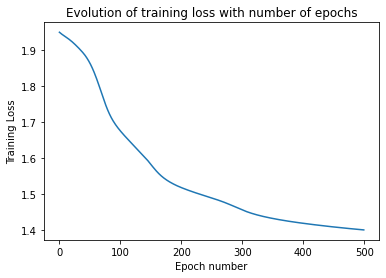

In [402]:
plt.plot(loss_list)
plt.xlabel("Epoch number")
plt.ylabel("Training Loss")
plt.title("Evolution of training loss with number of epochs")
plt.show()

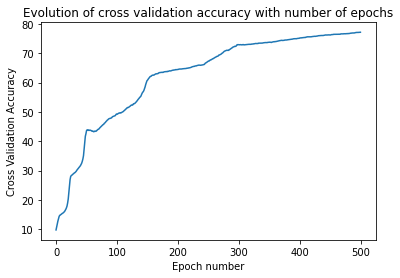

In [403]:
plt.plot(acc_list)
plt.xlabel("Epoch number")
plt.ylabel("Cross Validation Accuracy")
plt.title("Evolution of cross validation accuracy with number of epochs")
plt.show()

In [409]:
y_pred = torch.argmax(model(torch.Tensor(X_test)), dim=1) + 1
y_pred = y_pred.numpy().flatten()

In [ ]:
y_test = np.argmax(y_test, axis=1) +1

In [418]:
# Compute accuracy
accuracy = accuracy_score(y_pred, y_test)

# Compute the precision, recall, and F1 score
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='macro')

# Create a data frame with the results
results = pd.DataFrame({'Metric': ['Accuracy', 'Precision', 'Recall', 'F1'],
                        'Neural N': [accuracy, precision, recall, f1]})

results

,Metric,Neural N
0,Accuracy,0.771958
1,Precision,0.768604
2,Recall,0.769801
3,F1,0.767843


In [419]:
result = result.join(results['Neural N'])

In [ ]:
# Test
test_data = pd.read_csv("test-full.csv", index_col='Id')
X_submit = torch.Tensor(preprocess(test_data, False))
y_pred = model(X_submit)
y_pred = torch.argmax(y_pred, dim=1) + 1

In [ ]:
submission_df=pd.DataFrame(y_pred,columns=['Cover_Type'])
submission_df.index += 1
submission_df.index.names = ['Id']
submission_df.to_csv('submission_neural.csv', header=True)

Obtained 0.68 on Kaggle

## Result

In [421]:
result

,Metric,ETC,RF,XGB,SVM,Log,KNN,Neural N
0,Accuracy,0.901058,0.886772,0.783598,0.804233,0.716667,0.846561,0.771958
1,Precision,0.897769,0.883330,0.779551,0.800973,0.712485,0.842851,0.768604
2,Recall,0.898928,0.884673,0.781224,0.802109,0.714586,0.843766,0.769801
3,F1,0.897787,0.883099,0.776395,0.800253,0.712545,0.841256,0.767843
